In [34]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) 
    if isinstance(skill_list, str) else skill_list)

Filter for Indian Data Analyst Roles

In [52]:
df_da_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

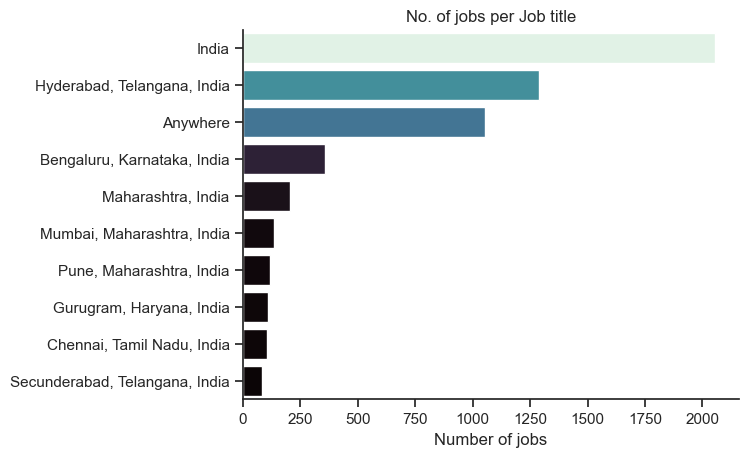

In [36]:
df_plot = df_da_us['job_location'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot, x='count', y='job_location',hue='count', palette='mako',legend=False)
sns.set_theme(style='ticks')

sns.despine()
plt.title('No. of jobs per Job title')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()

0 job_work_from_home Work from home
1 job_no_degree_mention job degree req
2 job_health_insurance Health Insurance offered


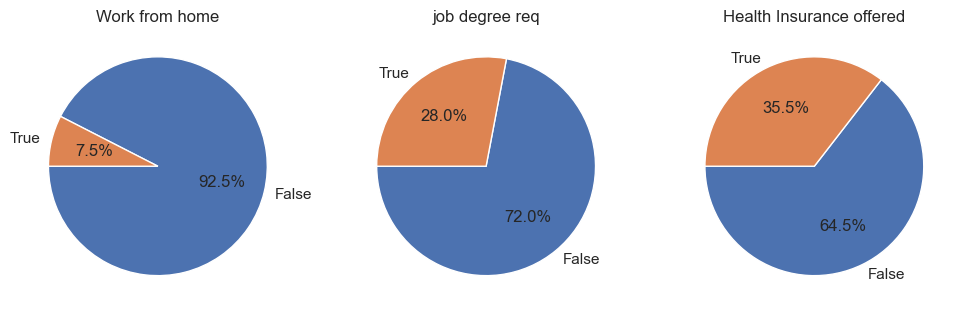

In [53]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))
dict_column = {
    'job_work_from_home':'Work from home',
    'job_no_degree_mention': 'job degree req',
    'job_health_insurance': 'Health Insurance offered'
}
for i,(column,title) in enumerate(dict_column.items()):
    print(i,column,title)
    ax[i].pie(df_da_us[column].value_counts(),startangle=180,autopct='%1.1f%%',labels=['False','True'])
    ax[i].set_title(title)

plt.show()

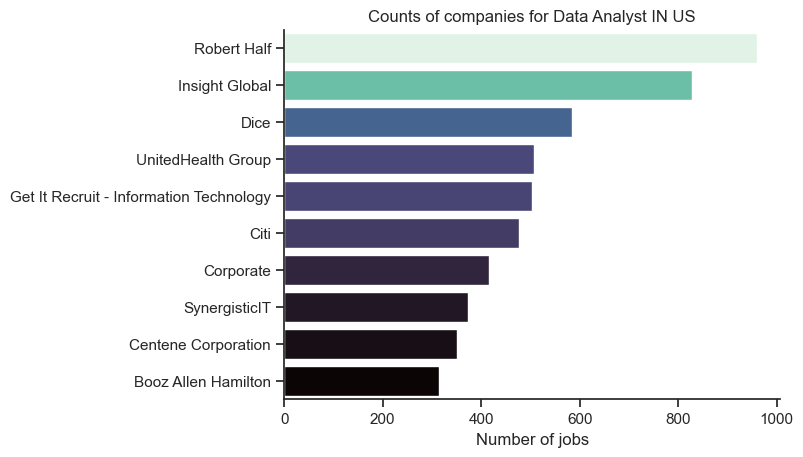

In [54]:
df_plot = df_da_us['company_name'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot, x='count', y='company_name',hue='count', palette='mako',legend=False)
sns.set_theme(style='ticks')

sns.despine()
plt.title('Counts of companies for Data Analyst IN US')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()